In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

GD: Gradient Descent 경사 하강법

고차원 방정식에서 W를 비용함수(RSS)를 이용하여 직관적으로 도출하기 위해.

**경사 하강법은 반복적으로 비용 함수의 반환 값 즉 예측 값과 실제 값의 차이가 작아지는 방향성을 가지고 오류를 감소시키는 방향으로 w를 지속적으로 보정해 간다.**

이때 미분된 1차 함수의 기울기가 최소인 점이 비용함수가 최소인 지점이다.

미분은 수학적으로 증가 혹은 감소의 방향성을 의미. 파라미터들을 다 미분해야하기때문에 편미분을 사용.

이 편미분 된 값에 -LR을 곱하여 기존 값에서 뺀다. (실제값-예측값)

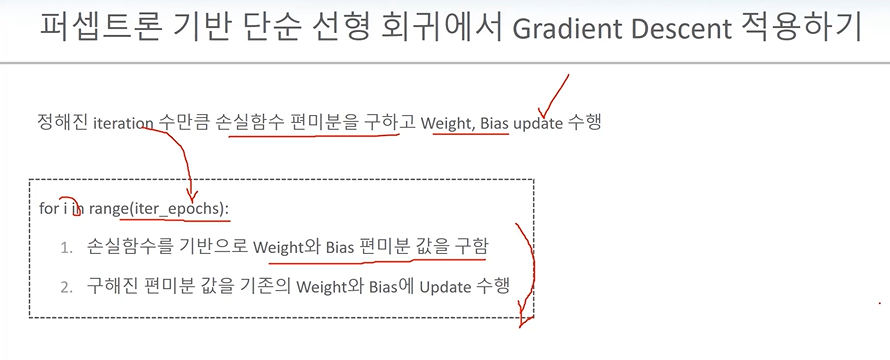

**보스턴 주택가격 데이터 set 이용**

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [10]:
 boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
def get_update_weights_value(bias, w1, w2, rm, lstat, target, learning_rate=0.01):
    
    # 데이터 건수
    N = len(target)
    # 예측 값. 
    predicted = w1 * rm + w2*lstat + bias
    # 실제값과 예측값의 차이 
    diff = target - predicted
    # bias 를 array 기반으로 구하기 위해서 설정. 
    bias_factors = np.ones((N,))
    
    # weight와 bias를 얼마나 update할 것인지를 계산.  
    w1_update = -(2/N)*learning_rate*(np.dot(rm.T, diff))
    w2_update = -(2/N)*learning_rate*(np.dot(lstat.T, diff))
    bias_update = -(2/N)*learning_rate*(np.dot(bias_factors.T, diff))
    
    # Mean Squared Error값을 계산. 
    mse_loss = np.mean(np.square(diff))
    
    # weight와 bias가 update되어야 할 값과 Mean Squared Error 값을 반환. 
    return bias_update, w1_update, w2_update, mse_loss

In [13]:
# RM, LSTAT feature array와 PRICE target array를 입력 받아서 iter_epochs수만큼 반복적으로 Weight와 Bias를 update적용. 
def gradient_descent(features, target, iter_epochs=1000, verbose=True):
    # w1, w2는 numpy array 연산을 위해 1차원 array로 변환하되 초기 값은 0으로 설정
    # bias도 1차원 array로 변환하되 초기 값은 1로 설정. 
    w1 = np.zeros((1,))
    w2 = np.zeros((1,))
    bias = np.zeros((1, ))
    print('최초 w1, w2, bias:', w1, w2, bias)
    
    # learning_rate와 RM, LSTAT 피처 지정. 호출 시 numpy array형태로 RM과 LSTAT으로 된 2차원 feature가 입력됨.
    learning_rate = 0.01
    rm = features[:, 0]
    lstat = features[:, 1]
    
    # iter_epochs 수만큼 반복하면서 weight와 bias update 수행. 
    for i in range(iter_epochs):
        # weight/bias update 값 계산 
        bias_update, w1_update, w2_update, loss = get_update_weights_value(bias, w1, w2, rm, lstat, target, learning_rate)
        # weight/bias의 update 적용. 
        w1 = w1 - w1_update
        w2 = w2 - w2_update
        bias = bias - bias_update
        if verbose:
            print('Epoch:', i+1,'/', iter_epochs)
            print('w1:', w1, 'w2:', w2, 'bias:', bias, 'loss:', loss)
        
    return w1, w2, bias

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 꼭 스케일링 먼저 해야함!!!!!!!!!!!!!!!
scaled_features = scaler.fit_transform(bostonDF[['RM', 'LSTAT']])

w1, w2, bias = gradient_descent(scaled_features, bostonDF['PRICE'].values, iter_epochs=5000, verbose=True)
print('##### 최종 w1, w2, bias #######')
print(w1, w2, bias)

최초 w1, w2, bias: [0.] [0.] [0.]
Epoch: 1 / 5000
w1: [0.252369] w2: [0.10914761] bias: [0.45065613] loss: 592.1469169960474
Epoch: 2 / 5000
w1: [0.4982605] w2: [0.21458377] bias: [0.8890071] loss: 564.6567515182813
Epoch: 3 / 5000
w1: [0.73785103] w2: [0.31641055] bias: [1.315389] loss: 538.6424811965484
Epoch: 4 / 5000
w1: [0.97131229] w2: [0.41472723] bias: [1.73012873] loss: 514.0245946883915
Epoch: 5 / 5000
w1: [1.1988113] w2: [0.50963037] bias: [2.13354428] loss: 490.7278647125017
Epoch: 6 / 5000
w1: [1.42051052] w2: [0.60121392] bias: [2.52594493] loss: 468.6811172230454
Epoch: 7 / 5000
w1: [1.63656797] w2: [0.68956922] bias: [2.90763152] loss: 447.81701302090454
Epoch: 8 / 5000
w1: [1.84713735] w2: [0.77478516] bias: [3.27889669] loss: 428.07184113172934
Epoch: 9 / 5000
w1: [2.05236818] w2: [0.85694818] bias: [3.64002506] loss: 409.3853233168043
Epoch: 10 / 5000
w1: [2.25240586] w2: [0.93614234] bias: [3.9912935] loss: 391.700429116892
Epoch: 11 / 5000
w1: [2.44739187] w2: [1.012

In [15]:
predicted = scaled_features[:, 0]*w1 + scaled_features[:, 1]*w2 + bias
bostonDF['PREDICTED_PRICE'] = predicted
bostonDF.head(10)
# (PREDICTED_PRICE-PRICE)^2의 mean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.935533
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.483093
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.545474
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.334142
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.516284
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,28.074722
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.342942
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.772340
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,8.129206
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.276548


In [16]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # 단 하나의 units 설정. input_shape는 2차원, 회귀이므로 activation은 설정하지 않음. 
    # weight와 bias 초기화는 kernel_inbitializer와 bias_initializer를 이용. 
    Dense(1, input_shape=(2, ), activation=None, kernel_initializer='zeros', bias_initializer='ones')
])
# Adam optimizer를 이용하고 Loss 함수는 Mean Squared Error, 성능 측정 역시 MSE를 이용하여 학습 수행. 
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
model.fit(scaled_features, bostonDF['PRICE'].values, epochs=1000)
#우리는 Dense 함수 하나로 이제 GD를 구할것!

2023-02-09 07:46:22.462662: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-09 07:46:22.587698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
16/16 [==============================] - 1s 1ms/step - loss: 542.3713 - mse: 542.3713
Epoch 2/1000
16/16 [==============================] - 0s 915us/step - loss: 530.1785 - mse: 530.1785
Epoch 3/1000
16/16 [==============================] - 0s 903us/step - loss: 518.2254 - mse: 518.2254
Epoch 4/1000
16/16 [==============================] - 0s 953us/step - loss: 506.5422 - mse: 506.5422
Epoch 5/1000
16/16 [==============================] - 0s 901us/step - loss: 495.0229 - mse: 495.0229
Epoch 6/1000
16/16 [==============================] - 0s 955us/step - loss: 483.8436 - mse: 483.8436
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 472.8819 - mse: 472.8819
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 462.1035 - mse: 462.1035
Epoch 9/1000
16/16 [==============================] - 0s 893us/step - loss: 451.5609 - mse: 451.5609
Epoch 10/1000
16/16 [==============================] - 0s 950us/step - loss: 441.3175 - mse: 441.

In [17]:
predicted = model.predict(scaled_features)
bostonDF['KERAS_PREDICTED_PRICE'] = predicted
bostonDF.head(10)
#여기까지는 그냥 batch 이제부터는 mini batch로 할것

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE,KERAS_PREDICTED_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.935533,28.988737
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.483093,25.512165
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.545474,32.647652
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.334142,32.425453
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.516284,31.611691
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,28.074722,28.116272
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.342942,21.331213
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.772340,17.752539
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,8.129206,8.036140
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.276548,18.250196


### Stochastic Gradient Descent와 Mini Batch Gradient Descent 구현
* SGD 는 전체 데이터에서 한건만 임의로 선택하여 Gradient Descent 로 Weight/Bias Update 계산한 뒤 Weight/Bias 적용
* Mini Batch GD는 전체 데이터에서 Batch 건수만큼 데이터를 선택하여 Gradient Descent로 Weight/Bias Update 계산한 뒤 Weight/Bias 적용

SGD와 Mini Batch의 차이 숙지할 것.
keras에서 default는 mini batch 32

In [19]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
def get_update_weights_value_sgd(bias, w1, w2, rm_sgd, lstat_sgd, target_sgd, learning_rate=0.01):
    
    # 데이터 건수
    N = target_sgd.shape[0]
    # 예측 값. 
    predicted_sgd = w1 * rm_sgd + w2*lstat_sgd + bias
    # 실제값과 예측값의 차이 
    diff_sgd = target_sgd - predicted_sgd
    # bias 를 array 기반으로 구하기 위해서 설정. 
    bias_factors = np.ones((N,))
    
    # weight와 bias를 얼마나 update할 것인지를 계산.  
    w1_update = -(2/N)*learning_rate*(np.dot(rm_sgd.T, diff_sgd))
    w2_update = -(2/N)*learning_rate*(np.dot(lstat_sgd.T, diff_sgd))
    bias_update = -(2/N)*learning_rate*(np.dot(bias_factors.T, diff_sgd))
    
    # Mean Squared Error값을 계산. 
    #mse_loss = np.mean(np.square(diff))
    
    # weight와 bias가 update되어야 할 값 반환 
    return bias_update, w1_update, w2_update



# 딱 하나만 초이스

In [21]:
print(bostonDF['PRICE'].values.shape)
print(np.random.choice(bostonDF['PRICE'].values.shape[0], 1))
print(np.random.choice(506, 1))

(506,)
[221]
[94]


In [22]:
# RM, LSTAT feature array와 PRICE target array를 입력 받아서 iter_epochs수만큼 반복적으로 Weight와 Bias를 update적용. 
def st_gradient_descent(features, target, iter_epochs=1000, verbose=True):
    # w1, w2는 numpy array 연산을 위해 1차원 array로 변환하되 초기 값은 0으로 설정
    # bias도 1차원 array로 변환하되 초기 값은 1로 설정. 
    np.random.seed = 2021
    w1 = np.zeros((1,))
    w2 = np.zeros((1,))
    bias = np.zeros((1, ))
    print('최초 w1, w2, bias:', w1, w2, bias)
    
    # learning_rate와 RM, LSTAT 피처 지정. 호출 시 numpy array형태로 RM과 LSTAT으로 된 2차원 feature가 입력됨.
    learning_rate = 0.01
    rm = features[:, 0]
    lstat = features[:, 1]
    
    
    # iter_epochs 수만큼 반복하면서 weight와 bias update 수행. 
    for i in range(iter_epochs):
        # iteration 시마다 stochastic gradient descent 를 수행할 데이터를 한개만 추출. 추출할 데이터의 인덱스를 random.choice() 로 선택. 
        stochastic_index = np.random.choice(target.shape[0], 1)
        rm_sgd = rm[stochastic_index]
        lstat_sgd = lstat[stochastic_index]
        target_sgd = target[stochastic_index]
        # SGD 기반으로 Weight/Bias의 Update를 구함.  
        bias_update, w1_update, w2_update = get_update_weights_value_sgd(bias, w1, w2, rm_sgd, lstat_sgd, target_sgd, learning_rate)
        
        # SGD로 구한 weight/bias의 update 적용. 
        w1 = w1 - w1_update
        w2 = w2 - w2_update
        bias = bias - bias_update
        if verbose:
            print('Epoch:', i+1,'/', iter_epochs)
            # Loss는 전체 학습 데이터 기반으로 구해야 함.
            predicted = w1 * rm + w2*lstat + bias
            diff = target - predicted
            mse_loss = np.mean(np.square(diff))
            print('w1:', w1, 'w2:', w2, 'bias:', bias, 'loss:', mse_loss)
        
    return w1, w2, bias

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(bostonDF[['RM', 'LSTAT']])

w1, w2, bias = st_gradient_descent(scaled_features, bostonDF['PRICE'].values, iter_epochs=5000, verbose=True)
print('##### 최종 w1, w2, bias #######')
print(w1, w2, bias)

최초 w1, w2, bias: [0.] [0.] [0.]
Epoch: 1 / 5000
w1: [0.18387354] w2: [0.10454857] bias: [0.436] loss: 567.0346975674427
Epoch: 2 / 5000
w1: [0.31522273] w2: [0.21024673] bias: [0.77319204] loss: 548.0559986745945
Epoch: 3 / 5000
w1: [0.56058054] w2: [0.3486525] bias: [1.1073576] loss: 526.5594443840424
Epoch: 4 / 5000
w1: [0.80552675] w2: [0.40392299] bias: [1.53997155] loss: 502.3520466200177
Epoch: 5 / 5000
w1: [0.87853903] w2: [0.49247716] bias: [1.76267822] loss: 490.78816051919506
Epoch: 6 / 5000
w1: [1.06506986] w2: [0.59327026] bias: [2.09871702] loss: 472.25403915424744
Epoch: 7 / 5000
w1: [1.73877546] w2: [0.62367865] bias: [2.95965471] loss: 424.557603777183
Epoch: 8 / 5000
w1: [1.89924693] w2: [0.71087222] bias: [3.24510142] loss: 410.06242974239905
Epoch: 9 / 5000
w1: [2.22955744] w2: [0.75933681] bias: [3.77733066] loss: 384.1475300296663
Epoch: 10 / 5000
w1: [2.35427521] w2: [0.87535434] bias: [4.0286442] loss: 372.1702997619859
Epoch: 11 / 5000
w1: [2.36542059] w2: [0.90

In [24]:
predicted = scaled_features[:, 0]*w1 + scaled_features[:, 1]*w2 + bias
bostonDF['PREDICTED_PRICE_SGD'] = predicted
bostonDF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE_SGD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.922515
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.415097
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.600868
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.381849
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.555481
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,28.045402
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.203559
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.583868
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,7.784477
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.091469
